# POLYNOMIAL REGRESSION

##### DATA PREPROCESSING

In [2]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the dataset

gamingData = pd.read_csv("3.1 Gaming_data.csv.csv")

# view the first 5 rows of the data
gamingData.head()

,Steps,Points
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [4]:
# view the dataset information

gamingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Steps   10 non-null     int64
 1   Points  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


<Axes: xlabel='Steps', ylabel='Points'>

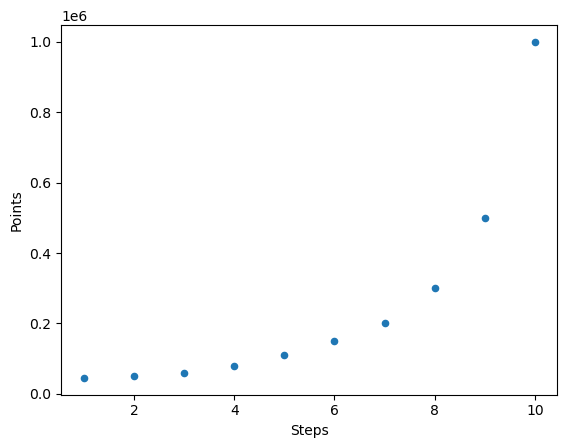

In [5]:
# view the scatter plot of the dataset

gamingData.plot(x="Steps", y="Points",kind="scatter")

In [6]:
# split the data into feature and target

X = gamingData["Steps"].values.reshape(-1,1) # there is a need to reshape the feature to be a matrix
Y = gamingData["Points"].values

In [7]:
# view the shape of the feature

X.shape

(10, 1)

- Because of how comparatively small the daataset is, we won't have to split into training and test set

We would also fit the data using Linear Regression and Polynomial to make a comparison of the model performance on the data

In [8]:
# Fitting the data to Linear Regression Model

# Importing the Libraries
from sklearn.linear_model import LinearRegression

# Initiate the Linear model
linear_model = LinearRegression()

# fit the model
linear_model.fit(X,Y)

LinearRegression()

In [9]:
# Fit the polynomial regression

from sklearn.preprocessing import PolynomialFeatures

# Initiate the polynomial regression object with degree of 2
poly_reg = PolynomialFeatures(degree=2)

# fit and transform the feature to a polynomial feature
X_poly = poly_reg.fit_transform(X)

# create the Linear Model
linear_model1 = LinearRegression()

# fit the transformed data on the linear model
linear_model1.fit(X_poly, Y)

LinearRegression()

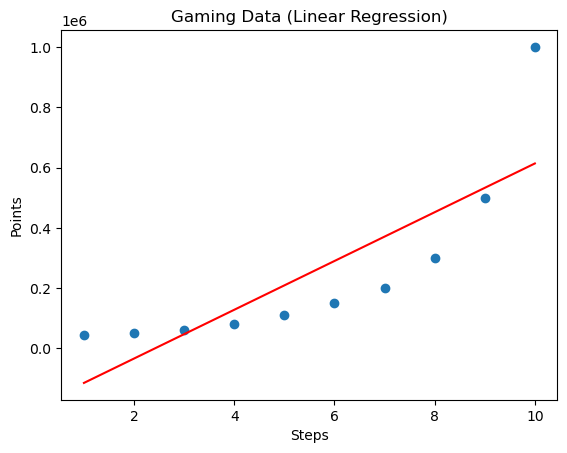

In [10]:
# visualize the linear regression result

plt.scatter(X,Y)
plt.plot(X, linear_model.predict(X), color="red")
plt.title("Gaming Data (Linear Regression)")
plt.xlabel("Steps")
plt.ylabel("Points")
plt.show()

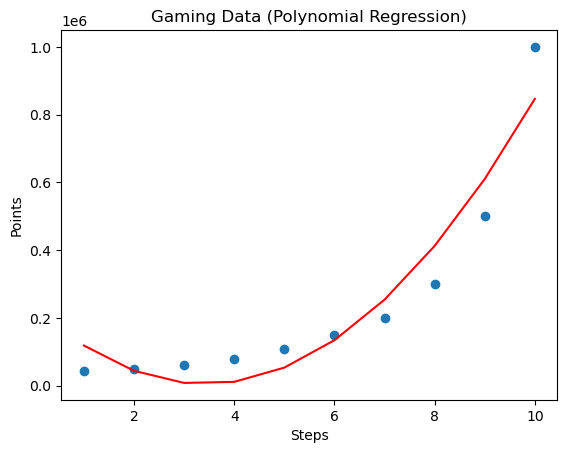

In [11]:
# visualize the polynomial regression result

plt.scatter(X,Y)
plt.plot(X, linear_model1.predict(X_poly),color="red")
plt.title("Gaming Data (Polynomial Regression)")
plt.xlabel("Steps")
plt.ylabel("Points")
plt.show()

- It is visible that polynomial with degree of 2 even though doesn't fit the data well, performs better than the linear regression model, we therefore optimize our model by increasing the degree to see how well the model can fit the data

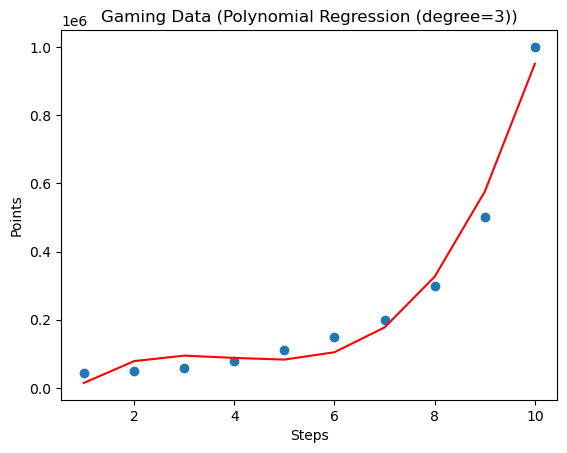

In [12]:
# Fit the polynomial regression

from sklearn.preprocessing import PolynomialFeatures

# Initiate the polynomial regression object with degree of 3
poly_reg1= PolynomialFeatures(degree=3)

# fit and transform the feature to a polynomial feature
X_poly1= poly_reg1.fit_transform(X)

# create the Linear Model
linear_model2 = LinearRegression()

# fit the transformed data on the linear model
linear_model2.fit(X_poly1, Y)



# visualize the polynomial regression result

plt.scatter(X,Y)
plt.plot(X, linear_model2.predict(X_poly1),color="red")
plt.title("Gaming Data (Polynomial Regression (degree=3))")
plt.xlabel("Steps")
plt.ylabel("Points")
plt.show()

- We can see an improvement in the model fitting the dataset with a degree of 3, we would repeat the model fitting and evaluation for degree of 4 to have a more generalized model

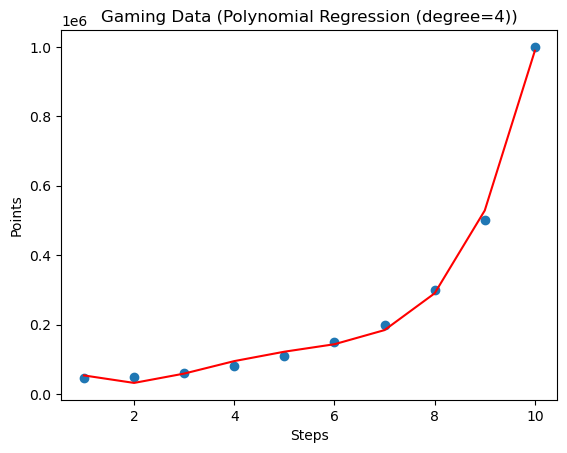

In [13]:
# Fit the polynomial regression

from sklearn.preprocessing import PolynomialFeatures

# Initiate the polynomial regression object with degree of 4
poly_reg2= PolynomialFeatures(degree=4)

# fit and transform the feature to a polynomial feature
X_poly2= poly_reg2.fit_transform(X)

# create the Linear Model
linear_model3 = LinearRegression()

# fit the transformed data on the linear model
linear_model3.fit(X_poly2, Y)



# visualize the polynomial regression result

plt.scatter(X,Y)
plt.plot(X, linear_model3.predict(X_poly2),color="red")
plt.title("Gaming Data (Polynomial Regression (degree=4))")
plt.xlabel("Steps")
plt.ylabel("Points")
plt.show()

We can agree that linear regression with a polynomial feature of degree 4 is a better model for the gaming data

### PREDICTING NEW VALUES

In [14]:
# Predict using the linear regression model

print(linear_model.predict([[4.5]]))

[168621.21212121]


In [15]:
# Predict using the polynomial regression model

print(linear_model3.predict(poly_reg2.fit_transform([[4.5]])))

[109582.14962124]


- Comparing the result with the dataset, we can see that the polynomial regression is a better model for this data compared to Linear Regression

# SUPPORT VECTOR MACHINE

 The steps involved in building an SVM model is similar to a basic model
 - Import the Libraries and the dataset
 - Split the dataset into feature and target variables
 - Split into training and test set
 - Perform feature scaling to the feature and target
 - Fit the SVR model to the dataset
 - Visualize your result
 - Make Predictions


 Since we have completed step 1 - 3, we would just perform feature scaling on the data and continue model training

In [17]:
# Perform feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y.reshape(-1,1))

In [18]:
# fit the dataset to SVR model

from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X,Y.ravel())

SVR()

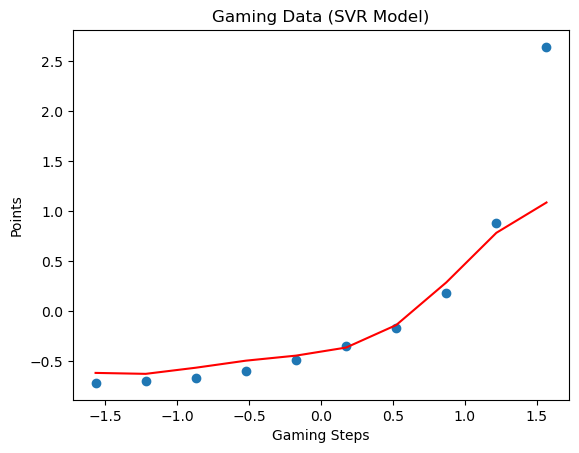

In [19]:
# visualize the SVR result
plt.scatter(X,Y)
plt.plot(X, regressor.predict(X), color="red")
plt.title("Gaming Data (SVR Model)")
plt.xlabel("Gaming Steps")
plt.ylabel("Points")
plt.show()

In [22]:
# Predicting a new result with SVR
Y_pred = regressor.predict(sc_X.transform([[4.5]]))
Y_pred = sc_Y.inverse_transform(Y_pred.reshape(-1,1))
print(Y_pred)

[[252845.34430288]]


### DECISION TREE

Since we already have the dataset loaded and splitted, we would have to fit the Decision Tree model to the dataset. It is important to note that a Decision Tree model doesn't require feature scaling since it is not a distance-based algorithm

In [26]:
# split the data into feature and target

X = gamingData["Steps"].values.reshape(-1,1) # there is a need to reshape the feature to be a matrix
Y = gamingData["Points"].values

In [27]:
# fit the model to the dataset

from sklearn.tree import DecisionTreeRegressor
decisionRegressor = DecisionTreeRegressor(random_state=0)
decisionRegressor.fit(X,Y)

DecisionTreeRegressor(random_state=0)

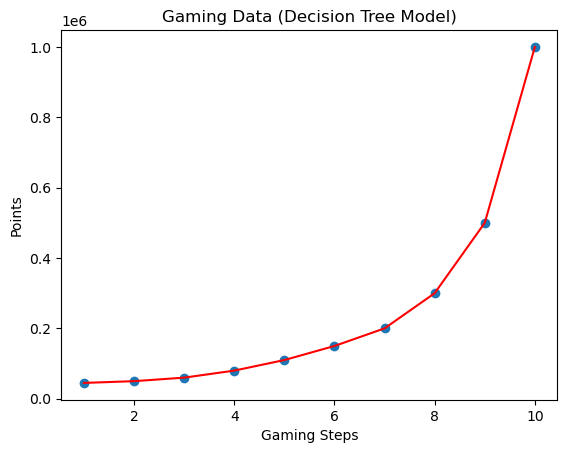

In [28]:
# visualize the result
plt.scatter(X,Y)
plt.plot(X, decisionRegressor.predict(X), color="red")
plt.title("Gaming Data (Decision Tree Model)")
plt.xlabel("Gaming Steps")
plt.ylabel("Points")
plt.show()